Use this notebook to re-generate plots with different settings

In [1]:
import matplotlib.pyplot as plt
from matplotlib import transforms
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as ss

In [2]:
# Set default sizes
plt.figure(figsize=(8, 5))

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [3]:
BASEPATH = '../thesis/images/'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


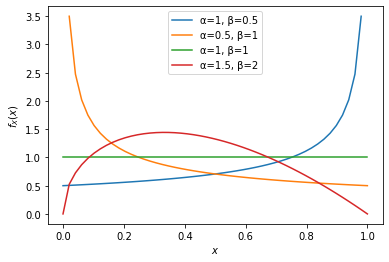

In [4]:
x = np.linspace(0, 1)

plt.plot(x, ss.beta.pdf(x, 1, 0.5), label='α=1, β=0.5')
plt.plot(x, ss.beta.pdf(x, 0.5, 1), label='α=0.5, β=1')
plt.plot(x, ss.beta.pdf(x, 1, 1), label='α=1, β=1')
plt.plot(x, ss.beta.pdf(x, 1.5, 2), label='α=1.5, β=2')
plt.legend()
plt.ylabel('$f_X(x)$')
plt.xlabel('$x$')
plt.savefig(BASEPATH + 'beta.eps')

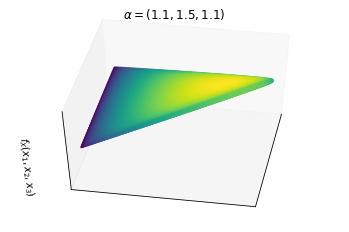

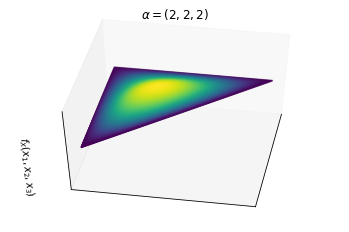

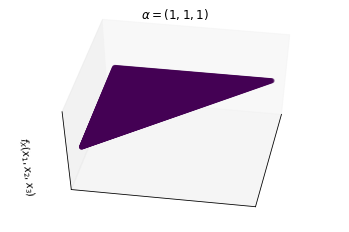

In [5]:
x, y, z = [], [], []
for x_1 in np.linspace(0, 1, 200):
    for x_2 in np.linspace(0, 1, 200):
        for x_3 in np.linspace(0, 1, 200):
            if (x_1 + x_2 + x_3 == 1 and
                    x_1 != 0 and x_2 != 0 and
                    x_3 != 0 and x_1 != 1 and
                    x_2 != 1 and x_3 != 1):
                x.append(x_1)
                y.append(x_2)
                z.append(x_3)

for t, alpha in enumerate([[1.1, 1.5, 1.1], [2, 2, 2], [1, 1, 1]]):
    dir_ns = [None]*len(x)
    for i in range(len(x)):
        dir_ns[i] = ss.dirichlet.pdf([x[i], y[i], z[i]], alpha)
    dir_ns = np.array(dir_ns)

    plt.figure(t)
    ax = plt.gca(projection='3d')
    ax.view_init(50, 10)
    plt.scatter(x, y, np.power(4, dir_ns), c=dir_ns, antialiased=True)
    plt.title(f'$ \\alpha = {tuple(alpha)}$')
    plt.xticks([])
    plt.yticks([])
    ax.set_zticks([])
    ax.set_zlabel('$f_X(x_1, x_2, x_3)$')
    plt.savefig(BASEPATH + 'dirichlet-' + str(t) + '.png', bbox_inches='tight')

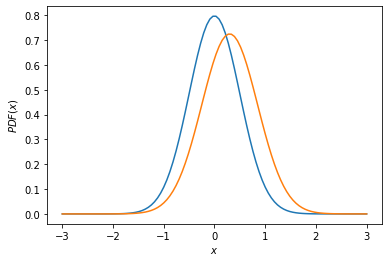

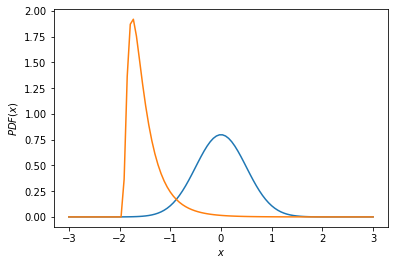

In [6]:
x = np.linspace(-3, 3, 100)

plt.plot(x, ss.norm.pdf(x, 0, 0.5))
plt.plot(x, ss.norm.pdf(x, 0.3, 0.55))
plt.ylabel('$PDF(x)$')
plt.xlabel('$x$')
plt.savefig(BASEPATH + 'diff-kl-1.eps')

plt.figure(2)
plt.plot(x, ss.norm.pdf(x, 0, 0.5))
plt.plot(x, ss.invgauss.pdf(x, 0.5, -2))
plt.ylabel('$PDF(x)$')
plt.xlabel('$x$')
plt.savefig(BASEPATH + 'diff-kl-2.eps')

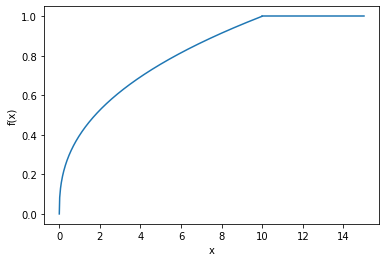

In [7]:
x = np.linspace(0, 10, 500)

y = np.power(x/10, 2/5)
xcap = [10, 15]
ycap = [1, 1]
plt.plot(x, y, 'C0')
plt.plot(xcap, ycap, 'C0')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.savefig(BASEPATH + 'glovef.eps')